In [1]:
import fastai
fastai.__version__

'2.1.8'

In [2]:
from fastai.tabular.all import *

In [3]:
path = Path('/kaggle/input/tabular-playground-series-jan-2021/')

In [4]:
train_df = pd.read_csv(path/'train.csv')

In [5]:
train_df.head(10)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046
5,9,0.352623,0.258867,0.327373,0.802627,0.284219,0.296886,0.209743,0.273710,0.308018,0.235851,0.278760,0.251406,0.339135,0.293129,7.346874
6,11,0.259096,0.803934,0.580900,0.322884,0.984705,0.378247,0.432821,0.562059,0.290965,0.316543,0.219192,0.326977,0.458653,0.244300,8.616237
7,12,0.481610,0.805446,0.235836,0.365011,0.734725,0.404825,0.465061,0.578794,0.418807,0.451958,0.458720,0.586586,0.321026,0.834694,6.833895
8,13,0.667920,0.776422,0.255154,0.869598,0.678067,0.475274,0.493290,0.638779,0.491023,0.617451,0.413352,0.485558,0.474055,0.608374,8.540793
9,15,0.937751,0.236482,0.216445,0.476463,0.283642,0.456763,0.316416,0.785602,0.695845,0.370941,0.436835,0.826278,0.856748,0.418593,7.701053


In [6]:
# letslook at this id  bit more closely
train_df['id'].unique() 

array([     1,      3,      4, ..., 499997, 499998, 499999])

In [7]:
# should we treat it as discrete or let it be?
train_df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [8]:
test_df = pd.read_csv(path/'test.csv')
test_df.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


Creating dataloaders 
from : https://www.kaggle.com/slm37102/tabular-using-neural-network-fastai-starter

In [9]:
# getting the continuos data column we are dropping the first column
cont_nn = list(train_df.iloc[:,1:-1])

In [10]:
# splitting manually
len(train_df)

# upto 240000 for training and rest for validation

300000

In [11]:
splits = (list(range(240000)), list(range(240000,300000)))

In [12]:
procs_nn = [Categorify, FillMissing,Normalize]

to_nn = TabularPandas(train_df, procs_nn, cont_names=cont_nn, splits=splits, y_names='target')

In [14]:
dls = to_nn.dataloaders(1024)

using tabular learner

In [15]:
learn = tabular_learner(dls, y_range=(0,11))

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0012022644514217973)

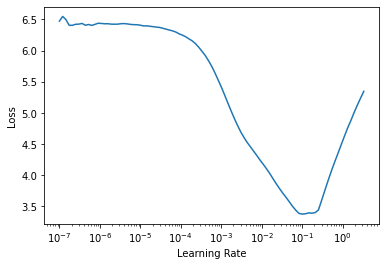

In [16]:
learn.lr_find()

In [17]:
learn.fit_one_cycle(20, 3e-4)

epoch,train_loss,valid_loss,time
0,2.713982,1.751796,00:03
1,0.617971,0.546427,00:04
2,0.531855,0.522182,00:04
3,0.523142,0.517112,00:04
4,0.517541,0.513836,00:03
5,0.517627,0.513620,00:04
6,0.511692,0.510100,00:03
7,0.509706,0.510952,00:04
8,0.509872,0.510373,00:03
9,0.508970,0.509870,00:04


In [18]:
tst_dl = learn.dls.test_dl(test_df)
pred, _ = learn.get_preds(dl=tst_dl)

In [20]:
submission_df = pd.read_csv(path/'sample_submission.csv')
submission_df['target'] = pred.squeeze()
submission_df.to_csv('submission.csv', index= False)
submission_df

,id,target
0,0,8.045254
1,2,7.782151
2,6,8.072642
3,7,8.104692
4,10,8.128231
...,...,...
199995,499984,8.093183
199996,499985,8.048399
199997,499987,8.067443
199998,499988,8.016932
